# Name: Parthav Joshi
# Roll No: C045
# Aim: Implement Random Forest and Ada boost algorithms on a real world dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
train = pd.read_csv('heart_fail_data.csv')

In [3]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
X = train.iloc[:, :-1] # input feature
y = train.iloc[:,-1] # output features
display(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
301,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29
302,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30
303,90.0,1,60,1,50,0,226000.00,1.0,134,1,0,30
304,82.0,1,855,1,50,1,321000.00,1.0,145,0,0,30


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Random Forest Classifier

In [7]:
rfc = RandomForestClassifier(criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [8]:
preds = rfc.predict(X_test)

In [9]:
score=rfc.score(X_test, y_test)
print(score)

0.8225806451612904


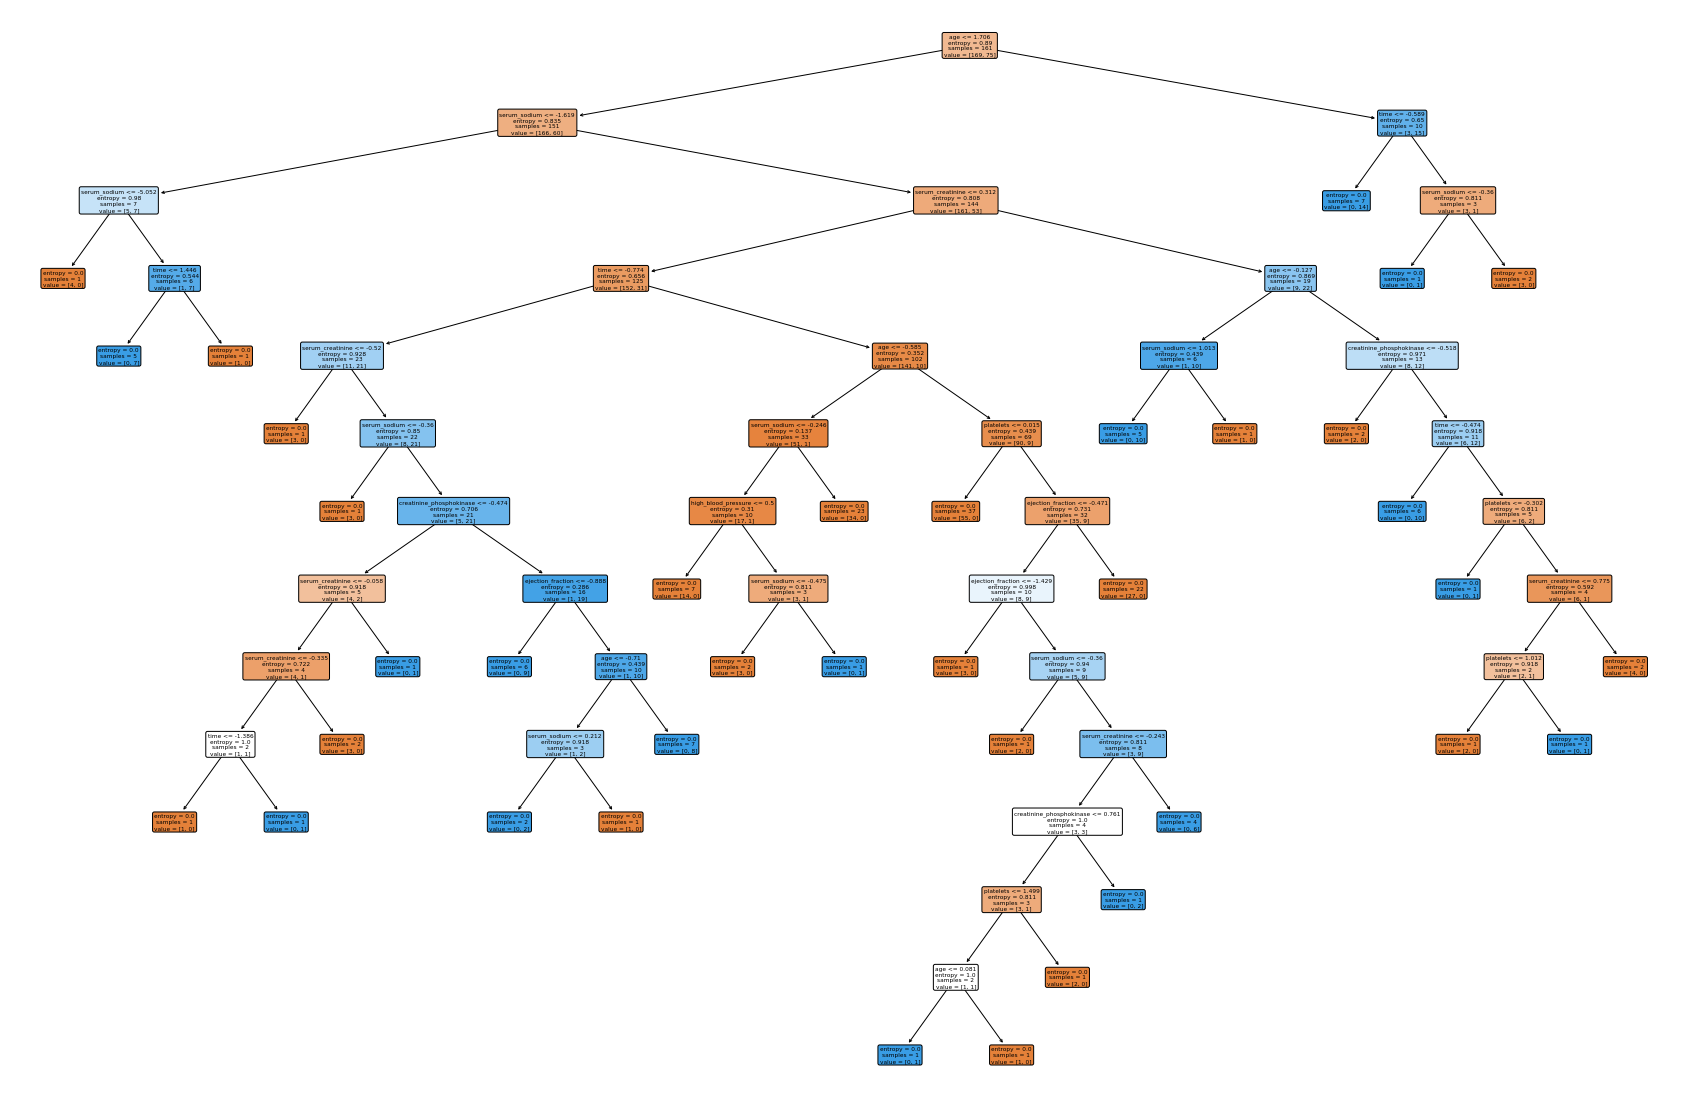

In [10]:
features = train.columns
features
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30, 20))
plot_tree(rfc.estimators_[0], # estimators as 0 to plot the tree in the first step
          feature_names=features, 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

## Ada boost classifier

In [11]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [12]:
preds = ada.predict(X_test)

In [13]:
score=ada.score(X_test, y_test)
print(score)

0.7903225806451613


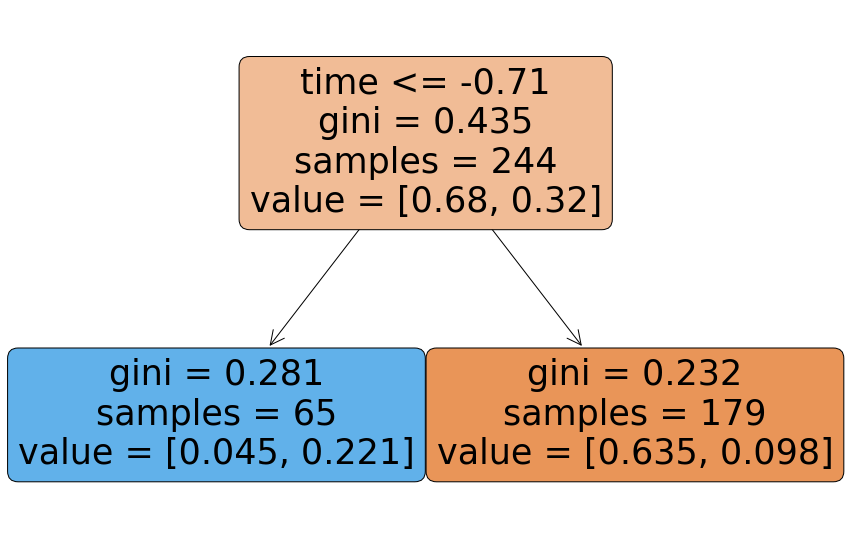

In [14]:
features = train.columns
features
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15,10))
plot_tree(ada.estimators_[0], # estimators as 0 to plot the tree in the first step
          feature_names=features, 
          filled=True, impurity=True, 
          rounded=True)
plt.show()